# Data Analysis Project – Credit Risk Dataset

Credit risk assessment is a critical process in the financial industry that helps lenders evaluate the likelihood of a borrower defaulting on a loan. This dataset contains comprehensive information about loan applicants, including their demographic details, financial history, credit score, income level, employment status, loan purpose, and repayment behavior.

The primary goal of this analysis is to identify the factors that influence whether a customer is likely to repay or default on a loan. By understanding patterns within the data, financial institutions can make smarter, data-driven lending decisions, reduce risk exposure, and improve approval strategies.

- Credit risk modeling is essential for banks, lending companies, and fintech platforms to prevent losses and build responsible lending systems. By leveraging this dataset, we can uncover valuable insights, predict default likelihood, and support better risk management decisions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

# 1.Data Loading 

In [2]:
credit_df = pd.read_csv("credit_risk_dataset.csv")
credit_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# 2.Data Understanding
-  Understanding what your data contains, data types, missing values, column meanings, basic distributions/checks.


In [3]:
credit_df.head(5) # shows first 5 rows

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
credit_df.tail(5) # shows last 5 rows

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [5]:
credit_df.sample(5) # shows any 5 random rows

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
25581,32,86800,MORTGAGE,6.0,HOMEIMPROVEMENT,A,2800,7.88,0,0.03,N,9
25987,32,75000,RENT,3.0,VENTURE,D,12800,14.74,0,0.17,Y,9
30080,43,71015,RENT,8.0,VENTURE,B,5000,11.14,0,0.07,N,14
20515,30,51000,RENT,14.0,MEDICAL,B,4800,12.69,0,0.09,N,10
18728,28,51000,RENT,2.0,EDUCATION,E,16000,16.32,1,0.31,Y,9


Shape of dataset , number of rows and columns

In [167]:
print("Shape:",credit_df.shape)
print("Rows:",credit_df.shape[0])
print("columns:",credit_df.shape[1])

Shape: (32581, 12)
Rows: 32581
columns: 12


In [6]:
credit_df.columns # shows all columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [7]:
credit_df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [8]:
credit_df.index

RangeIndex(start=0, stop=32581, step=1)

In [9]:
credit_df.info()  # tells Data types, Missing values, Memory usage, non0null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
credit_df.describe() # summary statistics for numerical columns

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
credit_df.describe(include = 'object')  # statistics for categorical data

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [12]:
credit_df.describe(include ='all')   # statistics for both numerical and categorical data 

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [15]:
credit_df['person_emp_length'].max()

123.0

In [16]:
credit_df['person_emp_length'].min()

0.0

In [17]:
credit_df['person_age'].max()

144

In [18]:
credit_df['person_age'].min()

20

In [20]:
credit_df['person_income'].max()

6000000

In [19]:
credit_df['person_income'].min()

4000

# Checking Missing Values 

In [23]:
credit_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Observation 
- There are two Missing value columns
- 1.Person_emp_length - 895
- 2.Loan_int_rate     - 3116

# Handling Missing Values
- Fill/impute  Missing Values
- Dropping Missing Rows

In [24]:
# Filling Missing Values 

In [25]:
credit_df["person_emp_length"] = credit_df["person_emp_length"].fillna(0)  # fill NAN with '0'

In [26]:
credit_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [27]:
# Dropping Missing Values

In [28]:
credit_df.dropna(axis=0, subset =["loan_int_rate"], inplace = True)

Observation 
- It drops only the rows(axis=0) where the column loan_int_rate(subset) has a missing value

In [29]:
# after Deleting rows See the shape of dataset 
credit_df.shape

(29465, 12)

In [30]:
credit_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Finding duplicate Values 

In [31]:
credit_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 29465, dtype: bool

In [32]:
credit_df.duplicated().sum()  # count of duplicate rows

144

In [33]:
credit_df[credit_df.duplicated()]  # shows duplicated records

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
31947,40,38000,RENT,4.0,DEBTCONSOLIDATION,D,7000,15.99,1,0.18,N,16
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12


Observation 
- There are 144 duplicated data in a dataset,if we wont drop it will occur Data Redundancy,Misleading Insights,In Accurate statistics.

In [34]:
credit_df = credit_df.drop_duplicates()

In [35]:
credit_df.duplicated().sum()  # deleted all duplicated rows

0

Understanding the columns

In [36]:
credit_df["person_age"].unique()  # gives array of unique values in particular columns

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  50,  37,  39,  40,  43,  41,  46,
        38,  47,  42,  44,  48,  45,  49,  58,  65,  51,  53,  66,  57,
        59,  62,  54,  60,  55,  52,  61,  64,  70,  78,  69,  56,  73,
        63,  80,  84,  76,  67], dtype=int64)

In [37]:
credit_df["loan_intent"].value_counts()   # frequency count

loan_intent
EDUCATION            5820
MEDICAL              5426
VENTURE              5119
PERSONAL             4994
DEBTCONSOLIDATION    4683
HOMEIMPROVEMENT      3279
Name: count, dtype: int64

In [38]:
credit_df["person_home_ownership"].value_counts()

person_home_ownership
RENT        14838
MORTGAGE    12054
OWN          2336
OTHER          93
Name: count, dtype: int64

# Data manipulation 

In [39]:
# Indexing - Indexing refers to selecting specific rows and columns from a DataFrame.
# Column Indexing 
credit_df[["person_age"]]

,person_age
0,22
1,21
2,25
3,23
4,24
...,...
32576,57
32577,54
32578,65
32579,56


In [40]:
credit_df[["person_income","loan_intent"]]

,person_income,loan_intent
0,59000,PERSONAL
1,9600,EDUCATION
2,9600,MEDICAL
3,65500,MEDICAL
4,54400,MEDICAL
...,...,...
32576,53000,PERSONAL
32577,120000,PERSONAL
32578,76000,HOMEIMPROVEMENT
32579,150000,PERSONAL


- We cannot directly extract rows using column-style indexing (df['row']).
To access rows, we must use loc or iloc
- loc → label-based row selection
- iloc → position-based row selection

In [41]:
# Indexig using loc

credit_df.loc[5]  # row with index label = 5

person_age                         21
person_income                    9900
person_home_ownership             OWN
person_emp_length                 2.0
loan_intent                   VENTURE
loan_grade                          A
loan_amnt                        2500
loan_int_rate                    7.14
loan_status                         1
loan_percent_income              0.25
cb_person_default_on_file           N
cb_person_cred_hist_length          2
Name: 5, dtype: object

In [42]:
credit_df.loc[5:15]            # rows 5 to 15 (inclusive)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4
11,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N,2
12,23,95000,RENT,2.0,VENTURE,A,35000,7.90,1,0.37,N,2
13,26,108160,RENT,4.0,EDUCATION,E,35000,18.39,1,0.32,N,4
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4


In [43]:
credit_df.loc[credit_df["person_home_ownership"] == "RENT"]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32571,60,45600,RENT,1.0,VENTURE,B,20000,10.00,1,0.44,N,26
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


In [44]:
credit_df.loc[:, ["person_age","person_income"]]

,person_age,person_income
0,22,59000
1,21,9600
2,25,9600
3,23,65500
4,24,54400
...,...,...
32576,57,53000
32577,54,120000
32578,65,76000
32579,56,150000


In [45]:
# Indexig using iloc

credit_df.iloc[0]            # first row
credit_df.iloc[3:8]          # rows 3 to 7
credit_df.iloc[:, 0:3]       # all rows, first 3 columns

,person_age,person_income,person_home_ownership
0,22,59000,RENT
1,21,9600,OWN
2,25,9600,MORTGAGE
3,23,65500,RENT
4,24,54400,RENT
...,...,...,...
32576,57,53000,MORTGAGE
32577,54,120000,MORTGAGE
32578,65,76000,RENT
32579,56,150000,MORTGAGE


# Filtering

In [46]:
credit_df.loc[credit_df["person_age"] > 23][["person_age"]]

# filters rows where age is greater than 23. 

,person_age
2,25
4,24
6,26
7,24
8,24
...,...
32576,57
32577,54
32578,65
32579,56


In [47]:
credit_df.loc[credit_df["person_home_ownership"] == "RENT", ["person_home_ownership"]]
# filter rows where person_home_ownership is rent

,person_home_ownership
0,RENT
3,RENT
4,RENT
6,RENT
7,RENT
...,...
32571,RENT
32574,RENT
32575,RENT
32578,RENT


In [48]:
credit_df[(credit_df["person_home_ownership"] == "OWN" ) & (credit_df["loan_intent"] == "EDUCATION")]
# filter rows where person_home_ownership is OWN and loan_intent is EDUCATION 

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
35,21,12000,OWN,5.0,EDUCATION,A,2500,7.51,1,0.21,N,4
43,23,300000,OWN,1.0,EDUCATION,F,24250,19.41,0,0.08,Y,2
72,21,12000,OWN,6.0,EDUCATION,C,3000,13.61,1,0.25,Y,3
75,26,12000,OWN,2.0,EDUCATION,A,6100,7.51,1,0.51,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32036,40,42996,OWN,15.0,EDUCATION,D,15000,16.00,0,0.35,Y,17
32089,42,48000,OWN,0.0,EDUCATION,C,3500,14.35,0,0.07,Y,17
32135,46,336000,OWN,11.0,EDUCATION,B,9000,11.49,0,0.03,N,14
32281,41,24000,OWN,3.0,EDUCATION,C,4500,12.99,0,0.19,Y,12


In [49]:
credit_df[credit_df["person_income"].between(50000,60000)][["person_income"]]

,person_income
0,59000
4,54400
97,60000
128,50000
129,50000
...,...
32473,56000
32556,50000
32559,58000
32572,52000


In [50]:
credit_df[credit_df["loan_intent"].isin(["PERSONAL","HOME"])]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
21,25,137000,RENT,9.0,PERSONAL,E,34800,16.77,0,0.25,Y,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3
24,22,80000,RENT,3.0,PERSONAL,D,33950,14.54,1,0.42,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N,19
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19


# groupby()
- groupby() is used to split data into groups, apply a function, and combine results.

In [51]:
# Default Rate by Loan Purpose (loan_intent)
credit_df.groupby('loan_intent')['loan_status'].mean()

loan_intent
DEBTCONSOLIDATION    0.286996
EDUCATION            0.173024
HOMEIMPROVEMENT      0.262885
MEDICAL              0.270549
PERSONAL             0.201642
VENTURE              0.148466
Name: loan_status, dtype: float64

In [52]:
# Default Rate by Loan Grade
credit_df.groupby('loan_grade')['loan_status'].mean().sort_values(ascending=False)


loan_grade
G    0.983051
F    0.700935
E    0.648864
D    0.595044
C    0.207781
B    0.163114
A    0.099866
Name: loan_status, dtype: float64

In [53]:
# Average Income by Home Ownership
credit_df.groupby('person_home_ownership')['person_income'].mean()

person_home_ownership
MORTGAGE    81010.123444
OTHER       79306.526882
OWN         58144.722175
RENT        55018.262839
Name: person_income, dtype: float64

In [54]:
# Total Loan Amount Given per Loan Intent
credit_df.groupby('loan_intent')['loan_amnt'].sum()

loan_intent
DEBTCONSOLIDATION    44943400
EDUCATION            55151350
HOMEIMPROVEMENT      33838950
MEDICAL              50263075
PERSONAL             47940200
VENTURE              48982075
Name: loan_amnt, dtype: int64

In [55]:
# Default Rate by Home Ownership
credit_df.groupby('person_home_ownership')['loan_status'].mean()

person_home_ownership
MORTGAGE    0.127510
OTHER       0.290323
OWN         0.071918
RENT        0.317833
Name: loan_status, dtype: float64

In [56]:
# Multiple Aggregations:

credit_df.groupby('loan_grade').agg({
    'loan_amnt':'mean',
    'loan_int_rate':'mean',
    'loan_status': 'mean',
    'person_income': 'median'
})

,loan_amnt,loan_int_rate,loan_status,person_income
loan_grade,,,,
A,8522.863688,7.328423,0.099866,57504.0
B,9971.760201,10.995756,0.163114,55000.0
C,9234.975899,13.464579,0.207781,53000.0
D,10847.521910,15.360698,0.595044,54000.0
E,12914.744318,17.008409,0.648864,59000.0
F,15207.359813,18.609159,0.700935,68125.0
G,18141.949153,20.251525,0.983051,74000.0


In [57]:
# Some examples of Groupby visualization

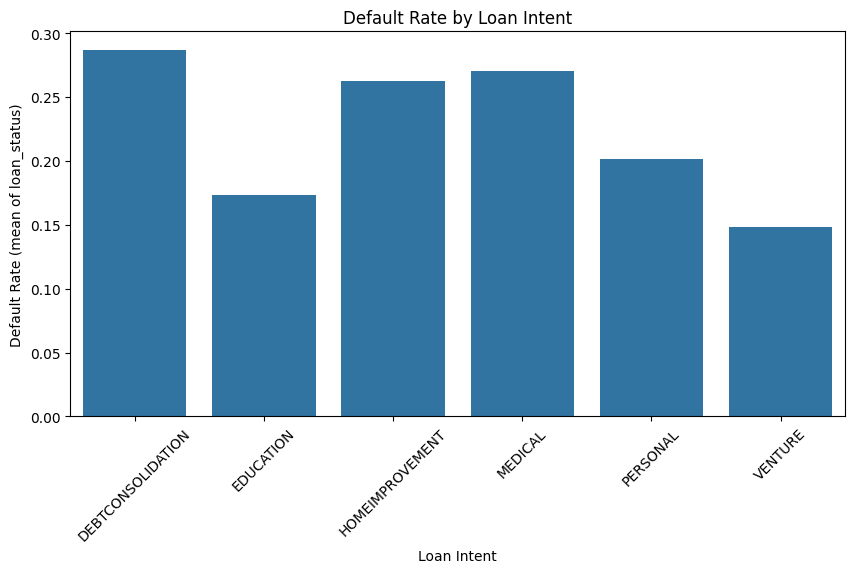

In [58]:
# Default Rate by Loan Intent

intent_default = credit_df.groupby('loan_intent')['loan_status'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=intent_default,x='loan_intent',y='loan_status')
plt.title("Default Rate by Loan Intent")
plt.ylabel("Default Rate (mean of loan_status)")
plt.xlabel("Loan Intent")
plt.xticks(rotation=45)
plt.show()


# Higher bar = more default risk

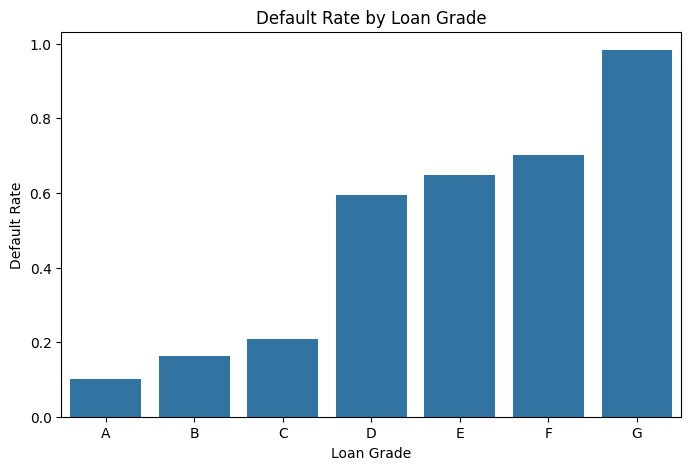

In [59]:
# Default Rate by Loan Grade

grade_default = credit_df.groupby('loan_grade')['loan_status'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=grade_default, x='loan_grade', y='loan_status')
plt.title("Default Rate by Loan Grade")
plt.ylabel("Default Rate")
plt.xlabel("Loan Grade")
plt.show()


# Grades D, E, F will usually show higher default.

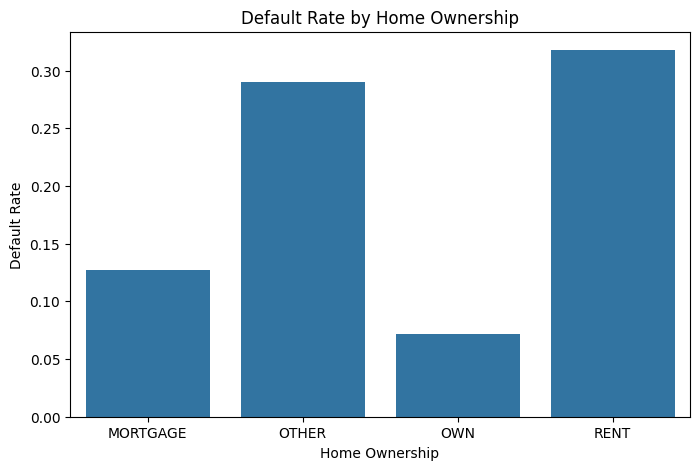

In [60]:
# default rate by home ownership

home_default = credit_df.groupby('person_home_ownership')['loan_status'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=home_default, x='person_home_ownership', y='loan_status')
plt.title("Default Rate by Home Ownership")
plt.ylabel("Default Rate")
plt.xlabel("Home Ownership")
plt.show()

# Renters generally default more than Owners.

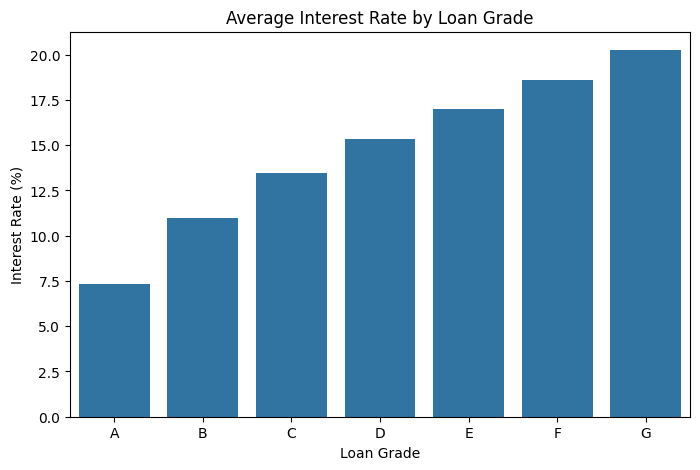

In [61]:
# Average Interest Rate by Loan Grade

grade_interest = credit_df.groupby('loan_grade')['loan_int_rate'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=grade_interest, x='loan_grade', y='loan_int_rate')
plt.title("Average Interest Rate by Loan Grade")
plt.ylabel("Interest Rate (%)")
plt.xlabel("Loan Grade")
plt.show()

# Banks charge higher interest to riskier grades (C, D, E).

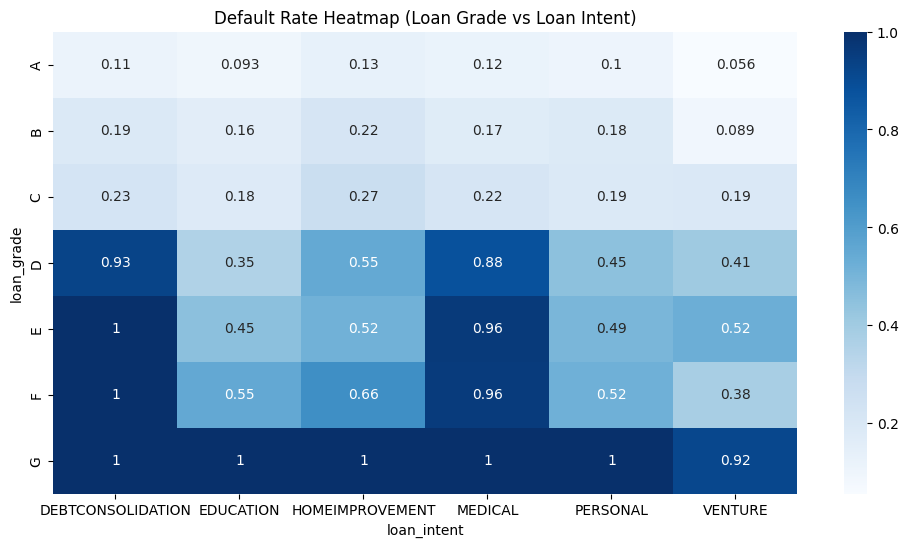

In [62]:
# Heatmap of Aggregated Data (Advanced)
# → Relationship of loan gender across multiple categories

heat = credit_df.pivot_table(
    values='loan_status',
    index='loan_grade',
    columns='loan_intent',
    aggfunc='mean'
)

plt.figure(figsize=(12,6))
sns.heatmap(heat, annot=True, cmap="Blues")
plt.title("Default Rate Heatmap (Loan Grade vs Loan Intent)")
plt.show()

# Shows high-risk combinations (e.g. Medical loans + D grade).

# Pivot Tables :
- A pivot table summarizes data by:
rows , columns , an aggregation function 

In [64]:
# Pivot Table — Average interest Rate by Home Ownership & loan_intent
pivot1 = credit_df.pivot_table(values='loan_status',index='loan_grade',columns='loan_intent',aggfunc='mean')
pivot1

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
loan_grade,,,,,,
A,0.114537,0.093165,0.130814,0.115186,0.104369,0.055684
B,0.190739,0.156474,0.215920,0.168647,0.182987,0.089275
C,0.225322,0.180544,0.271565,0.216486,0.188559,0.192929
D,0.928309,0.354515,0.546875,0.879599,0.448567,0.407197
E,1.000000,0.452941,0.515385,0.961039,0.492754,0.524691
F,1.000000,0.550000,0.655172,0.957447,0.518519,0.382353
G,1.000000,1.000000,1.000000,1.000000,1.000000,0.916667


Observation
- Values close to 1 → HIGH default
- Values close to 0 → LOW default
- This is a risk matrix.

In [65]:
# Pivot Table — Default Rate by Home Ownership & Past Default
pivot2 = credit_df.pivot_table(
    values='loan_status',
    index='person_home_ownership',
    columns='cb_person_default_on_file',
    aggfunc='mean'
)

pivot2


cb_person_default_on_file,N,Y
person_home_ownership,,
MORTGAGE,0.099445,0.288752
OTHER,0.228571,0.478261
OWN,0.063764,0.110565
RENT,0.278930,0.472502


Observation
- People who have defaulted earlier (Y) show significantly higher default probability again.

In [66]:
# Pivot Table — Credit History Length vs Loan Grade

pivot3 = credit_df.pivot_table(
    values='cb_person_cred_hist_length',
    index='loan_grade',
    columns='loan_status',
    aggfunc='mean'
)

pivot3


loan_status,0,1
loan_grade,,
A,5.765641,5.490722
B,5.793960,5.626395
C,5.920469,5.617233
D,6.074627,5.787709
E,5.805825,5.753065
F,6.625000,6.000000
G,6.000000,6.379310


Obsevation
- Longer credit history → safer borrowers.
- This table helps compare good vs bad customers.

In [67]:
# Pivot table - Average Income by Home Ownership × Loan Intent

pivot4 = credit_df.pivot_table(
    values='person_income',
    index='person_home_ownership',
    columns='loan_intent',
    aggfunc='mean'
)

pivot4

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
person_home_ownership,,,,,,
MORTGAGE,81336.177521,77122.531672,82711.131096,78702.977237,85212.878960,81722.561430
OTHER,54168.285714,102902.357143,111581.454545,58976.785714,69043.750000,84114.458333
OWN,42842.437500,55456.567568,61402.808081,63711.655612,57021.681373,57540.485591
RENT,55058.014218,54632.090294,65871.915948,49831.866213,54587.297760,56261.079503


Observation 
- Homeowners (own/mortgage) usually have higher income than renters.
- Useful for understanding financial stability.

In [ ]:
# VISUALIZE THE PIVOT TABLE (HEATMAP)

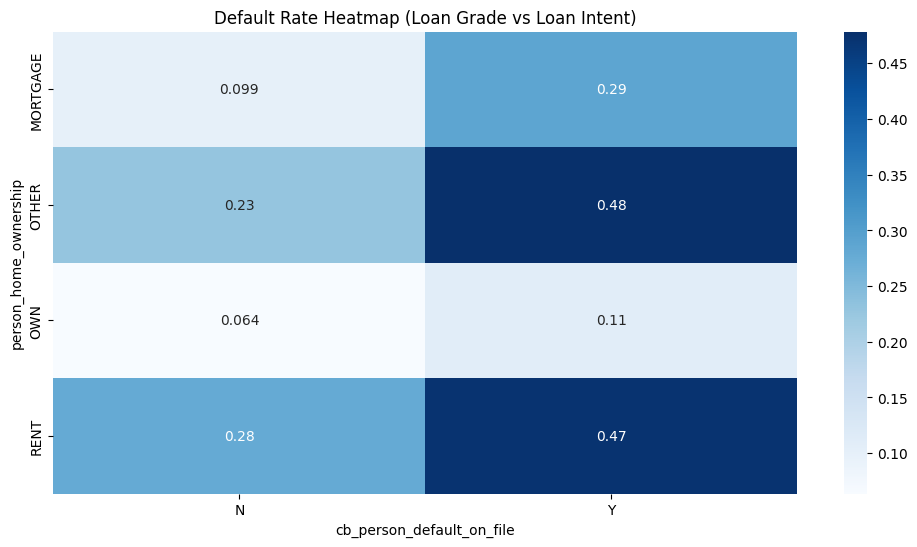

In [68]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot2, annot=True, cmap="Blues")
plt.title("Default Rate Heatmap (Loan Grade vs Loan Intent)")
plt.show()

# Finding Outliers 
- An outlier is a value that lies outside the typical range of the data.
Outliers are data points that are very different (unusually high or unusually low) compared to the rest of the values in the dataset.

In [69]:
Q1 = credit_df["person_emp_length"].quantile(0.25)
Q3 = credit_df["person_emp_length"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = credit_df[(credit_df['person_emp_length'] < lower_limit) | (credit_df["person_emp_length"] > upper_limit)]
outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
17834,34,948000,MORTGAGE,18.0,PERSONAL,B,2000,9.99,0,0.00,N,7
17847,35,500000,MORTGAGE,17.0,DEBTCONSOLIDATION,C,20000,13.85,0,0.04,Y,7
17850,34,120000,RENT,17.0,VENTURE,B,35000,10.59,0,0.29,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...
32516,52,29000,OWN,23.0,PERSONAL,A,7000,7.49,0,0.24,N,20
32519,51,115900,MORTGAGE,16.0,PERSONAL,A,12000,7.88,0,0.10,N,29
32534,76,75000,RENT,23.0,MEDICAL,A,15000,8.94,0,0.20,N,25
32539,61,148000,MORTGAGE,30.0,DEBTCONSOLIDATION,B,24000,10.38,1,0.16,N,20


In [70]:
print("Outliers in person_emp_length:", outliers.shape[0])
print("Lower limit  :", lower_limit)
print("Upper limit  :", upper_limit)


Outliers in person_emp_length: 772
Lower limit  : -5.5
Upper limit  : 14.5


Observation
- Used the Interquartile Range (IQR) method to detect extreme values in employment length.
- All these are outliers 

In [71]:
# Visualize outliers with boxplot

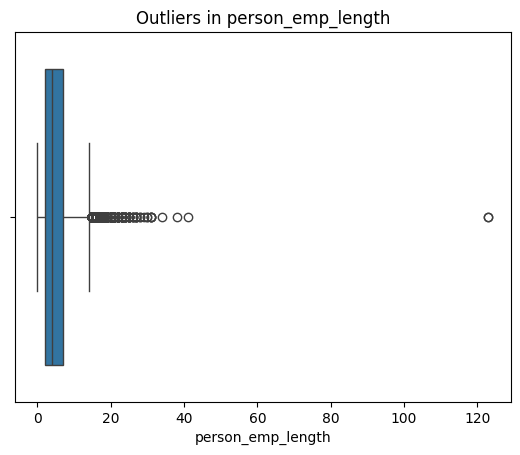

In [72]:
sns.boxplot(x=credit_df['person_emp_length'])
plt.title("Outliers in person_emp_length")
plt.show()

Observation 
- This will show black dots outside the whiskers → outliers

# Handling Outliers 
- There are 3 ways to handle them
- 1.Cap Outliers (Best Option)
- 2.Remove Outliers 
- 3.Replace outliers with median

- 1.Capping Outliers 
- If a value > upper limit → set to upper limit
- If a value < lower limit → set to lower limit

In [110]:
credit_df['person_emp_length'] = credit_df['person_emp_length'].clip(lower=lower_limit,upper= upper_limit)

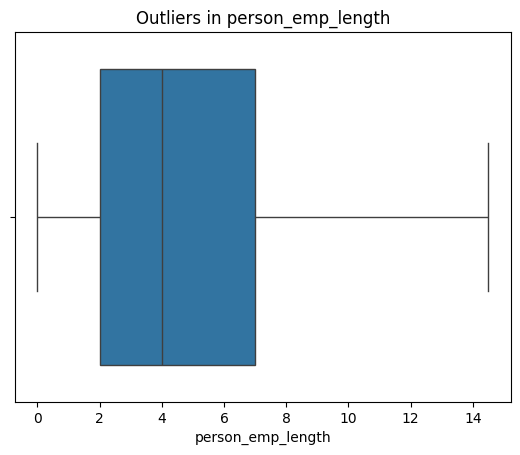

In [111]:
sns.boxplot(x=credit_df['person_emp_length'])
plt.title("Outliers in person_emp_length")
plt.show()

Observation
- The long outlier dots disappear completely,outliers were successfully capped at upper and lower IQR limits.
- All values fit within the whiskers.
- Boxplot looks normal and clean

In [153]:
# or 3.Replace outliers with median

median_value = credit_df['person_emp_length'].median()
credit_df.loc[(credit_df['person_emp_length'] < lower_limit) | (credit_df['person_emp_length'] > upper_limit),'person_emp_length'] = median_value

In [79]:
# Finding Outliers for all other numerical columns and handling them 

In [112]:
# Step 1: Select numeric columns
numeric_cols = ['person_age','person_income','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
# Step 2: Function for IQR Capping
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    return series.clip(lower_limit, upper_limit)

# Step 3: Apply capping to all numeric columns
for col in numeric_cols:
    credit_df[col] = cap_outliers(credit_df[col])

credit_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,14.5,PERSONAL,D,23125.0,16.02,1.0,0.44,Y,3.0
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0.0,0.10,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1.0,0.44,N,3.0
3,23.0,65500.0,RENT,4.0,MEDICAL,C,23125.0,15.23,1.0,0.44,N,2.0
4,24.0,54400.0,RENT,8.0,MEDICAL,C,23125.0,14.27,1.0,0.44,Y,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29316,40.5,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,0.0,0.11,N,15.5
29317,40.5,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,0.0,0.15,N,15.5
29318,40.5,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,23125.0,10.99,1.0,0.44,N,15.5
29319,40.5,140000.0,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,0.0,0.10,N,15.5


In [114]:
credit_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# After removing outliers from every column 

<Axes: xlabel='person_age'>

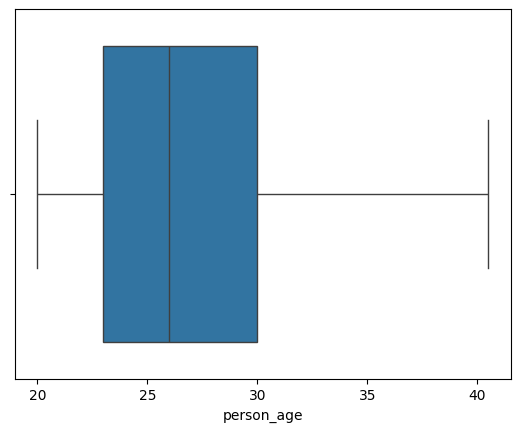

In [116]:
sns.boxplot(x=credit_df['person_age'])

<Axes: xlabel='person_income'>

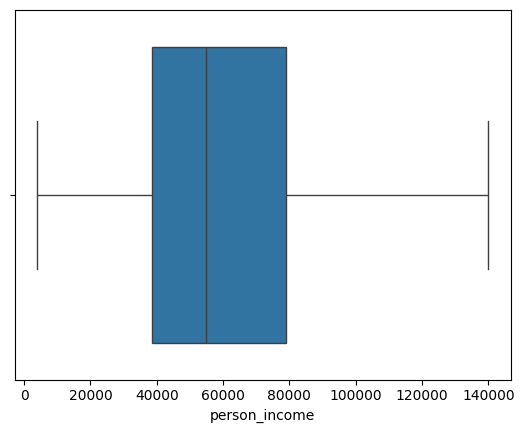

In [93]:
sns.boxplot(x=credit_df['person_income'])

<Axes: xlabel='loan_int_rate'>

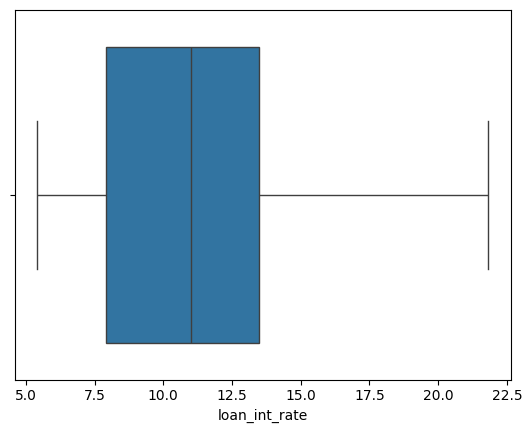

In [118]:
sns.boxplot(x=credit_df['loan_int_rate'])

Observation 
- Ouliers Removed from Every Numerical Columns

In [89]:
 # statistical techniques can be applied are ## mean,median,min,max,std,var

credit_df_num = credit_df.select_dtypes(['int','float'])
def numerical_analysis(num):
    for cal in num:
        print("- "*10,cal, "-"*10)
        print(credit_df_num[cal].agg(['mean','max', 'min', 'median','std','var']))
        
numerical_analysis(credit_df_num)


- - - - - - - - - -  person_age ----------
mean      27.440213
max       40.500000
min       20.000000
median    26.000000
std        5.260059
var       27.668219
Name: person_age, dtype: float64
- - - - - - - - - -  person_income ----------
mean      6.239805e+04
max       1.400000e+05
min       4.000000e+03
median    5.500000e+04
std       3.175868e+04
var       1.008614e+09
Name: person_income, dtype: float64
- - - - - - - - - -  person_emp_length ----------
mean       4.569012
max       14.500000
min        0.000000
median     4.000000
std        3.795495
var       14.405785
Name: person_emp_length, dtype: float64
- - - - - - - - - -  loan_amnt ----------
mean      9.415000e+03
max       2.312500e+04
min       5.000000e+02
median    8.000000e+03
std       5.831053e+03
var       3.400118e+07
Name: loan_amnt, dtype: float64
- - - - - - - - - -  loan_int_rate ----------
mean      11.017158
max       21.825000
min        5.420000
median    10.990000
std        3.241309
var       10.506

In [92]:
credit_df_cat = credit_df.select_dtypes(['object'])
def categorical_analysis(cat_data):
    for cal in cat_data:
        print()
        print("- "*10,cal, "-"*10)
        print(credit_df_cat[cal].agg(['unique','nunique',]))
        print(credit_df_cat[cal].value_counts())
        
categorical_analysis(credit_df_cat)


- - - - - - - - - -  person_home_ownership ----------
unique     [RENT, OWN, MORTGAGE, OTHER, nan]
nunique                                    4
Name: person_home_ownership, dtype: object
person_home_ownership
RENT        14838
MORTGAGE    12054
OWN          2336
OTHER          93
Name: count, dtype: int64

- - - - - - - - - -  loan_intent ----------
unique     [PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIM...
nunique                                                    6
Name: loan_intent, dtype: object
loan_intent
EDUCATION            5820
MEDICAL              5426
VENTURE              5119
PERSONAL             4994
DEBTCONSOLIDATION    4683
HOMEIMPROVEMENT      3279
Name: count, dtype: int64

- - - - - - - - - -  loan_grade ----------
unique     [D, B, C, A, E, F, G, nan]
nunique                             7
Name: loan_grade, dtype: object
loan_grade
A    9713
B    9337
C    5809
D    3309
E     880
F     214
G      59
Name: count, dtype: int64

- - - - - - - - - -  cb_person_default

# Final Summary after Data cleaning 
- Dataset shape: 29321 rows × 12 columns
- column types:
- Missing Values : No missing values now,removed
- Duplicated values : No duplicates now.
- Outliers Found and they are removed 

# Univariate Analysis 
- Analyzing ONE column at a time
- Understanding its distribution, frequency, range, shape, and outliers

- Univariate Analysis for NUMERICAL Columns uses Histogram or Box plots

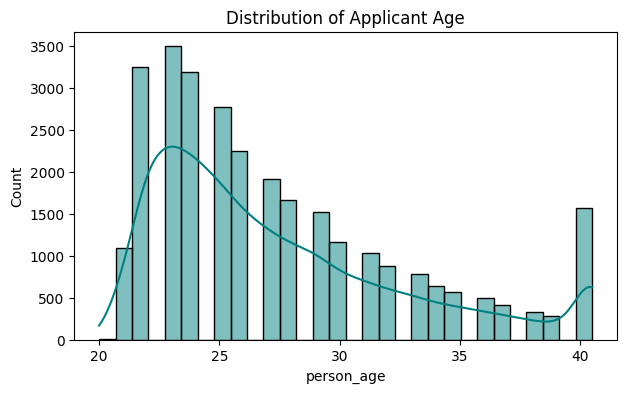

In [124]:
# HISTOGRAM

plt.figure(figsize = (7,4))
sns.histplot(credit_df["person_age"],kde=True,bins = 30 ,color = 'teal')
plt.title("Distribution of Applicant Age")
plt.show()

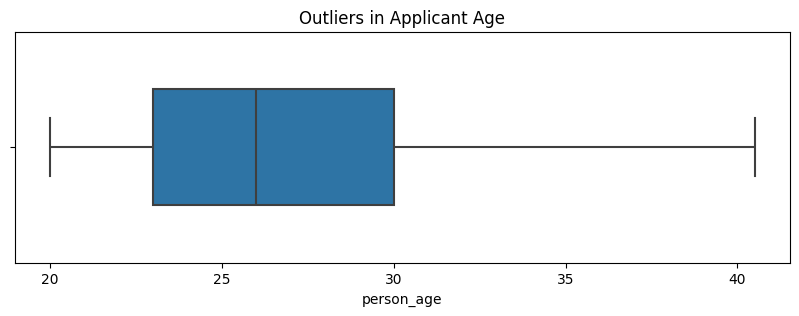

In [130]:
# BOX PLOT

plt.figure(figsize=(10,3))
sns.boxplot(x=credit_df['person_age'],
    width=0.5,             # box width
    linewidth=1.5,         # border thickness
    fliersize=3,           # size of outlier dots
    saturation=0.8         # color intensity
)
plt.title("Outliers in Applicant Age")
plt.show()

- Univariate Analysis for CATEGORICAL Columns uses count plot or Bar plots

- 1.Which type of home ownership is most common among applicants?

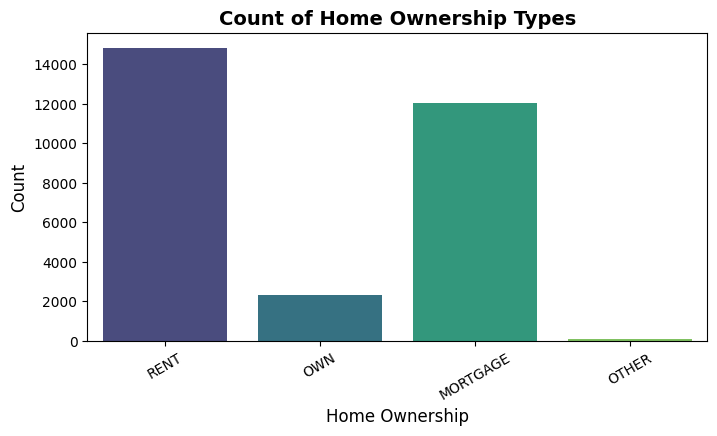

In [136]:
# COUNT PLOT

plt.figure(figsize=(8,4))
sns.countplot(
    x=credit_df["person_home_ownership"],
    palette="viridis", # beautiful gradient colors
    #edgecolor="black",
    linewidth=1.2
)

plt.title("Count of Home Ownership Types", fontsize=14, fontweight='bold')
plt.xlabel("Home Ownership", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=30)
plt.show()


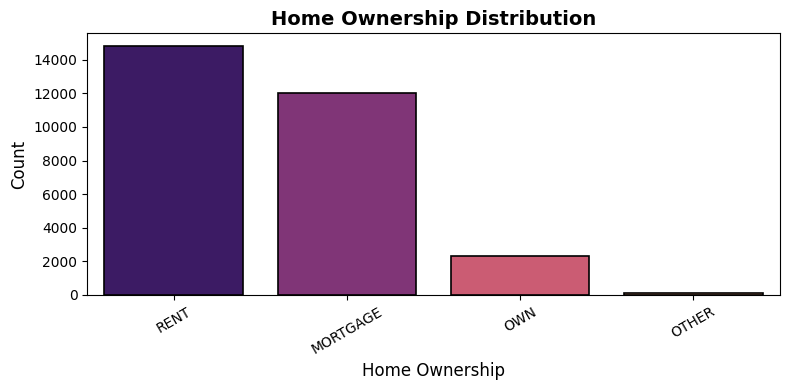

In [139]:
plt.figure(figsize=(8,4))

value_counts = credit_df["person_home_ownership"].value_counts()

sns.barplot(
    x=value_counts.index,
    y=value_counts.values,
    palette="magma",
    edgecolor="black",
    linewidth=1.2
)

plt.title("Home Ownership Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Home Ownership", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [ ]:
2.How many applicants have past default history?

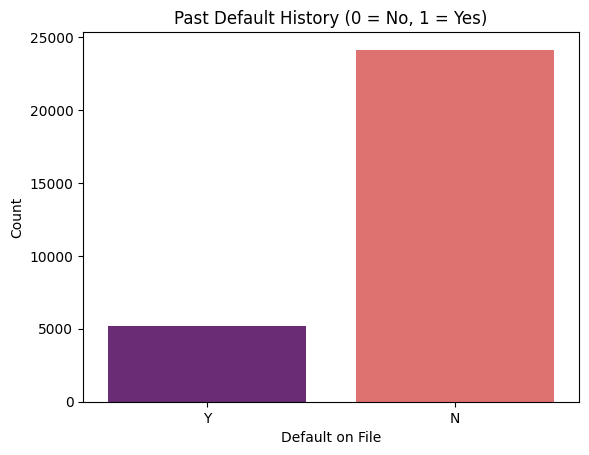

In [146]:
sns.countplot(x=credit_df["cb_person_default_on_file"],palette="magma")
plt.title("Past Default History (0 = No, 1 = Yes)")
plt.xlabel("Default on File")
plt.ylabel("Count")
plt.show()

# Bivariate Analysis:
Bivariate analysis is used to explore the relationship or association between two different variables. It
helps identify how one variable influences or correlates with another through comparison or correlation
technique

In [147]:
# Type 1: Numeric vs Numeric
# TYPE 2: Categorical vs Numeric
# TYPE 3: Categorical vs Categorical

In [ ]:
-1.Does credit history length impact loan amount?

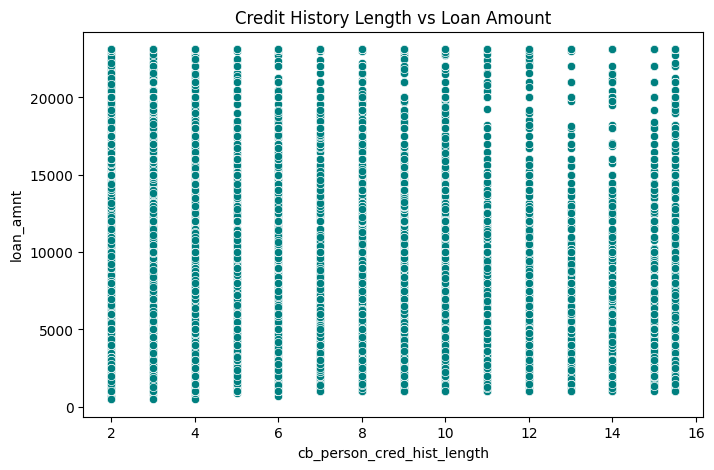

In [152]:
plt.figure(figsize = (8,5))
sns.scatterplot(x=credit_df["cb_person_cred_hist_length"],
    y=credit_df["loan_amnt"],color = 'teal')
plt.title("Credit History Length vs Loan Amount")
plt.show()

Observation:
- Dots are evenly spread
- Loan amounts look almost the same across all credit history lengths
- No trend, no curve, no pattern
- This means: credit history length does NOT strongly impact loan amount.

In [153]:
credit_df[["cb_person_cred_hist_length", "loan_amnt"]].corr()


,cb_person_cred_hist_length,loan_amnt
cb_person_cred_hist_length,1.00000,0.04593
loan_amnt,0.04593,1.00000


- The correlation between credit history length and loan amount is 0.0459, which is extremely weak.
- This indicates that applicants with longer credit histories do not necessarily request higher loan amounts.

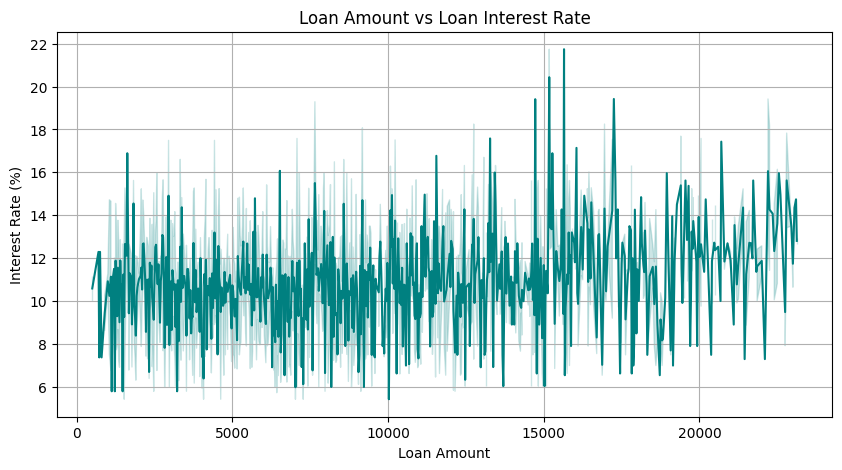

In [168]:
plt.figure(figsize=(10,5))

# Sort values so the line plot is meaningful
temp = credit_df.sort_values("loan_amnt")

sns.lineplot(
    x=temp["loan_amnt"],
    y=temp["loan_int_rate"],
    color="teal"
)

plt.title("Loan Amount vs Loan Interest Rate")
plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate (%)")
plt.grid(True)
plt.show()


Observation 
- No clear upward or downward trend
- There is no strong relationship between loan amount and loan interest rate. The line plot shows highly fluctuating interest rates across all loan amounts, indicating that lenders do not vary interest rates based solely on loan size.

In [ ]:
# Categorical vs Categorical 
# 3.Does home ownership status affect loan approval?

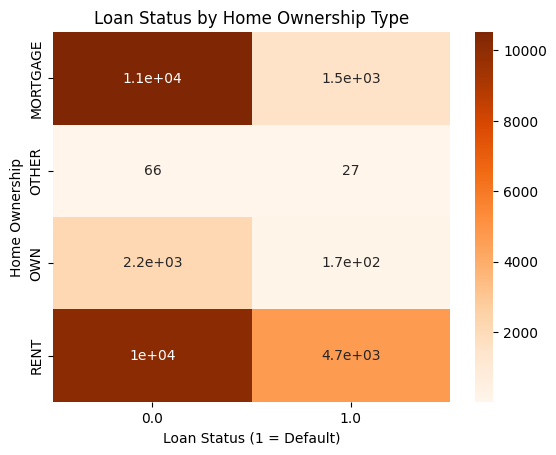

In [155]:
ct = pd.crosstab(credit_df["person_home_ownership"], credit_df["loan_status"])

sns.heatmap(ct, annot=True, cmap="Oranges")
plt.title("Loan Status by Home Ownership Type")
plt.xlabel("Loan Status (1 = Default)")
plt.ylabel("Home Ownership")
plt.show()


Obsevation 
- Renters default much more than home owners.
- Owners and mortgage holders are less risky borrowers.
- Yes, home ownership affects loan approval/loan status.

In [ ]:
# 4.Is default rate higher for any loan purpose?
- loan_intent → loan purpose
- loan_status → (0 = paid, 1 = default)

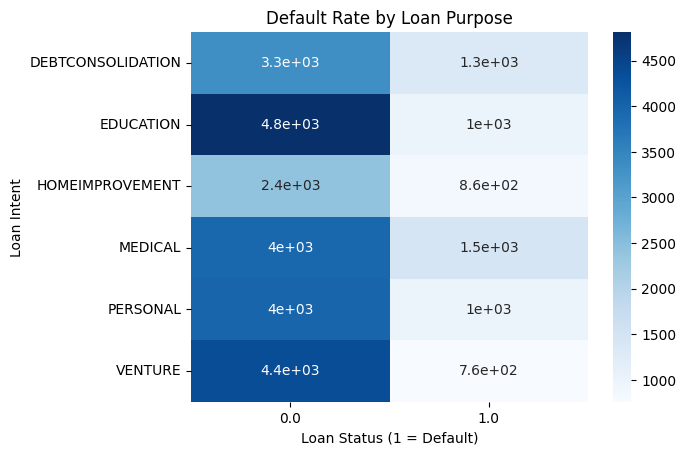

In [158]:
ct = pd.crosstab(credit_df["loan_intent"], credit_df["loan_status"])
sns.heatmap(ct, annot=True, cmap='Blues')
plt.title("Default Rate by Loan Purpose")
plt.xlabel("Loan Status (1 = Default)")
plt.ylabel("Loan Intent")
plt.show()

Observation
- Medical and Debt Consolidation loans show the highest default rates.
- Education, Venture, and Personal loans show lower default rates
- Default rate is NOT equal across loan purposes.

In [ ]:
# Categorical vs Numerical 

In [ ]:
# 5.How does income vary for different home ownership types?

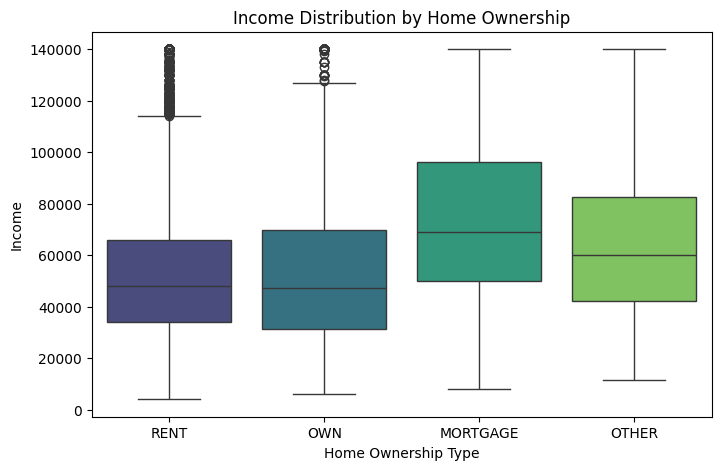

In [159]:
plt.figure(figsize=(8,5))
sns.boxplot(x=credit_df["person_home_ownership"],y=credit_df["person_income"],palette="viridis")
plt.title("Income Distribution by Home Ownership")
plt.xlabel("Home Ownership Type")
plt.ylabel("Income")
plt.show()

Observation
-The boxplot shows that applicants with MORTGAGE have the highest median income, followed by those who OWN their homes. Applicants who RENT have the lowest median income, indicating lower financial stability.

In [ ]:
# 6.Does interest rate differ across loan grade?

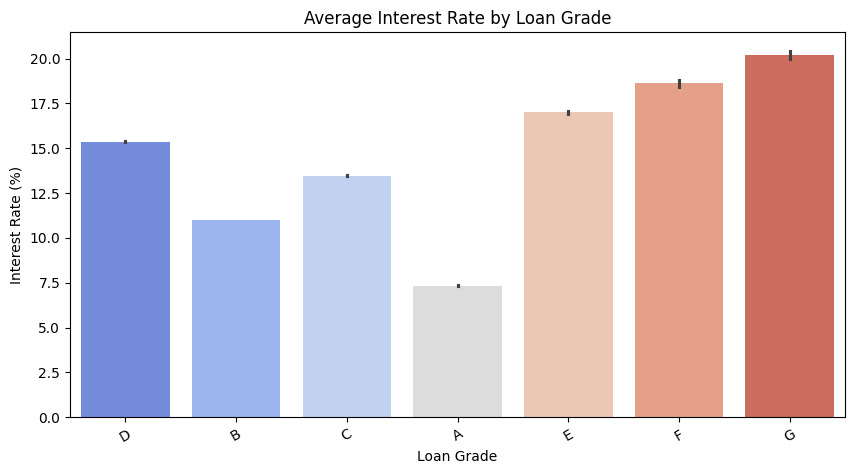

In [167]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=credit_df["loan_grade"],
    y=credit_df["loan_int_rate"],
    palette="coolwarm"
)
plt.title("Average Interest Rate by Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Interest Rate (%)")
plt.xticks(rotation=30)
plt.show()


Observation
-Interest rate increases as loan grade worsens,You will observe a clear upward trend:
- Grade A has the lowest interest rate
- Grade G has the highest interest rates
- Interest rates increase progressively from Grade A to Grade G. Borrowers with poor credit grades (F, G) are charged significantly higher interest rates. This indicates that loan grade is a strong indicator of lending risk, and lenders price risk accordingl

In [ ]:
# 7.Does loan grade affect loan amount?

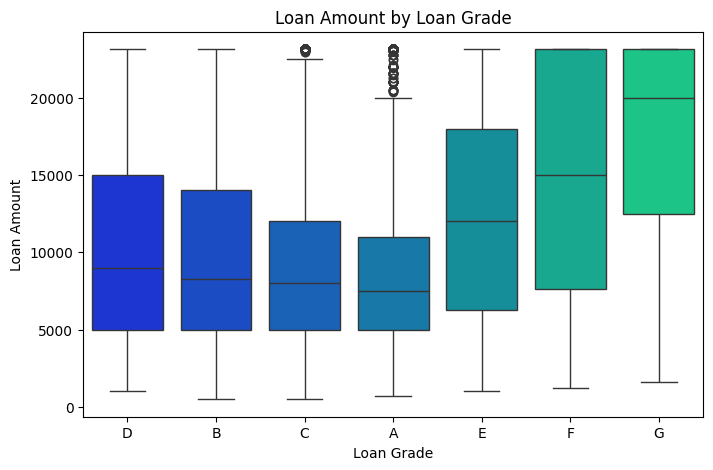

In [161]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x=credit_df["loan_grade"],
    y=credit_df["loan_amnt"],
    palette="winter"
)
plt.title("Loan Amount by Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Loan Amount")
plt.show()


Observation
- The plot shows that applicants with poor grades (F and G) tend to have higher loan amounts.

# Multivariate Analysis
-Multivariate analysis studies the relationship between 3 or more variables at the same time.

In [ ]:
# 1. How do loan amount, interest rate, and credit history together affect default?

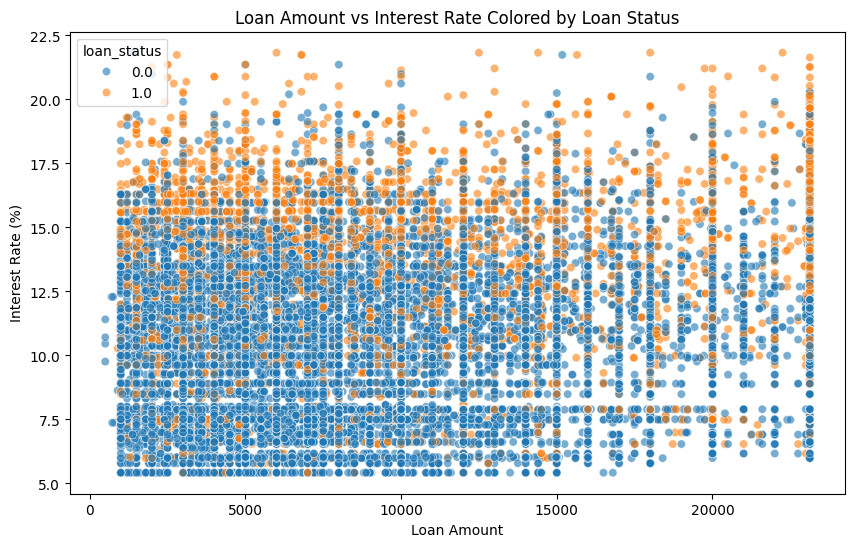

In [174]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=credit_df["loan_amnt"],
    y=credit_df["loan_int_rate"],
    hue=credit_df["loan_status"],
    alpha=0.6
)
plt.title("Loan Amount vs Interest Rate Colored by Loan Status")
plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate (%)")
plt.show()


Observation :
- 1.No clear trend between loan amount and interest rate
- The scatter is spread randomly → interest rate does NOT depend much on loan amount.
- 2.Defaulters (orange points) mostly appear at high interest rates
- Borrowers paying 15% or more interest are more likely to default.
- 3.Both defaulters and non-defaulters borrow similar loan amounts
- Loan amount is not a strong predictor of default.
    
* Defaulting is strongly related to higher interest rates, not loan amount.

In [ ]:
# 2. Does home ownership + income together influence default?

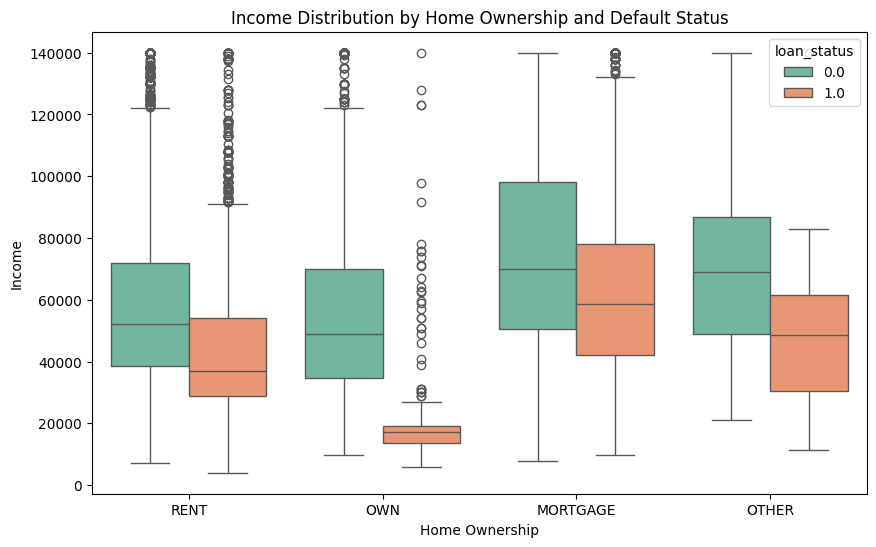

In [175]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x=credit_df["person_home_ownership"],
    y=credit_df["person_income"],
    hue=credit_df["loan_status"],
    palette="Set2"
)
plt.title("Income Distribution by Home Ownership and Default Status")
plt.xlabel("Home Ownership")
plt.ylabel("Income")
plt.show()


Observation
- 1.Mortgage applicants have the highest median income
- They show financial stability → reasonable, because banks approve mortgages for stable earners.
- 2. Renters have the lowest income and more defaulters
- Orange portions in RENT are thicker → renters default more.
- 3.Owners have moderate income and lower defaults
- Ownership indicates some financial stability.
    
- Low-income renters have the highest default rate, while high-income mortgage holders default least.

In [176]:
# 3.Which loan purpose + loan grade combination has the highest default rate?

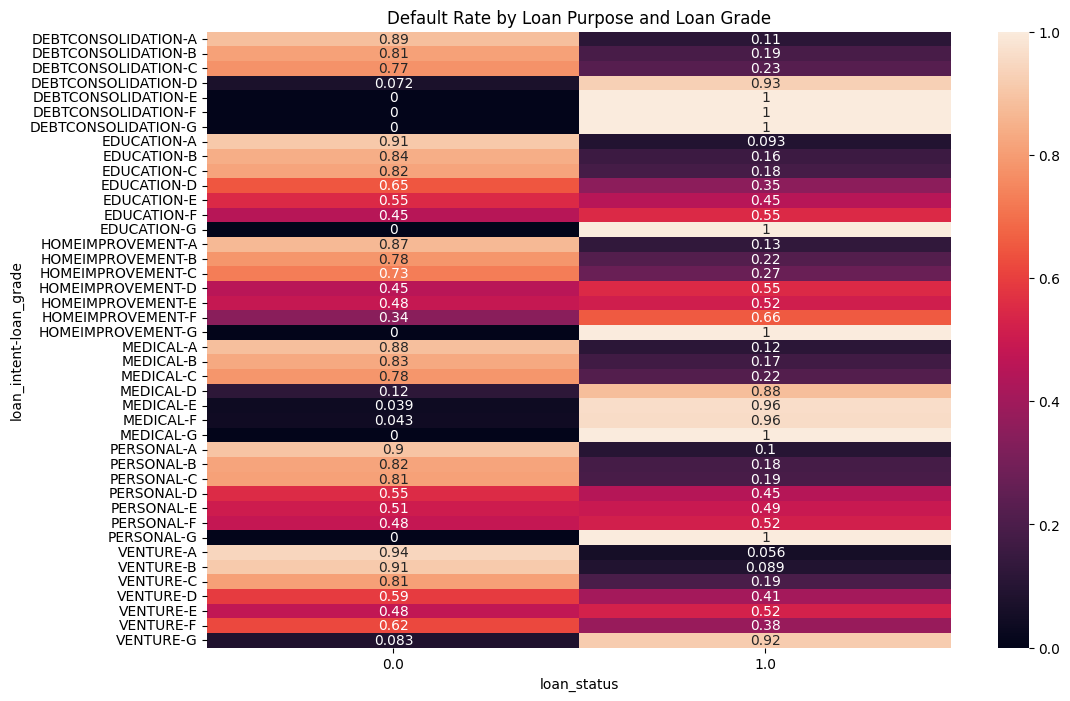

In [178]:
ct = pd.crosstab(
    [credit_df["loan_intent"], credit_df["loan_grade"]],
    credit_df["loan_status"],
    normalize="index"
)

plt.figure(figsize=(12,8))
sns.heatmap(ct, annot=True)
plt.title("Default Rate by Loan Purpose and Loan Grade")
plt.show()


Observation
- 1.Loan Grades F and G show the highest default rates
- These represent high-risk borrowers → consistent with lending reality.
- 2.Personal and Education loans show high default percentages, especially in lower grades.
- These loans are riskier because they are often unsecured.
- 3.Medical and Home Improvement loans have moderate default risk
- Medical loans sometimes spike due to emergency situations and unstable income.
- 4.Best performing borrowers are in Grade A–C across most purposes
    
- Default risk is highest for low-grade (F, G) borrowers taking Personal or Education loans.

In [182]:
# 4.Do defaulters have higher debt-to-income ratio AND shorter credit history?

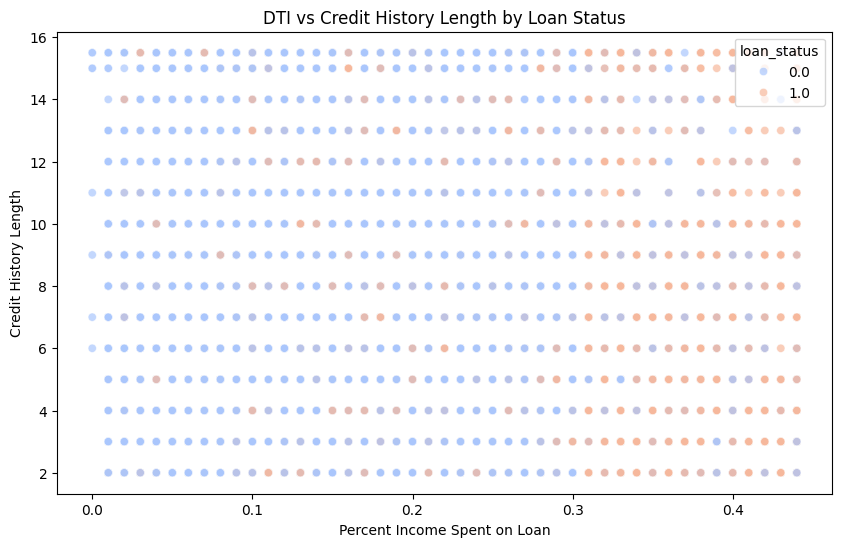

In [181]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=credit_df["loan_percent_income"],
    y=credit_df["cb_person_cred_hist_length"],
    hue=credit_df["loan_status"],
    palette="coolwarm",
    alpha=0.7
)
plt.title("DTI vs Credit History Length by Loan Status")
plt.xlabel("Percent Income Spent on Loan")
plt.ylabel("Credit History Length")
plt.show()


Observation 
- 1.Defaulters cluster at high DTI values
- Borrowers spending > 20–30% of income on loan payments have more orange points → higher default risk.
- 2.Defaulters also have shorter credit history (<5 years)
- Poor credit history + high debt burden → strong indicator of default.
- 3.Non-defaulters usually have long credit histories (10–16 years) and low DTI
Strong financial discipline.

- Default risk significantly increases when borrowers have both high debt-to-income ratio and short credit history.

# Pairplot
- A pairplot (from Seaborn) creates:
- Scatterplots for every numeric vs numeric pair
- Histograms on the diagonal
- hue to compare categories like loan_status

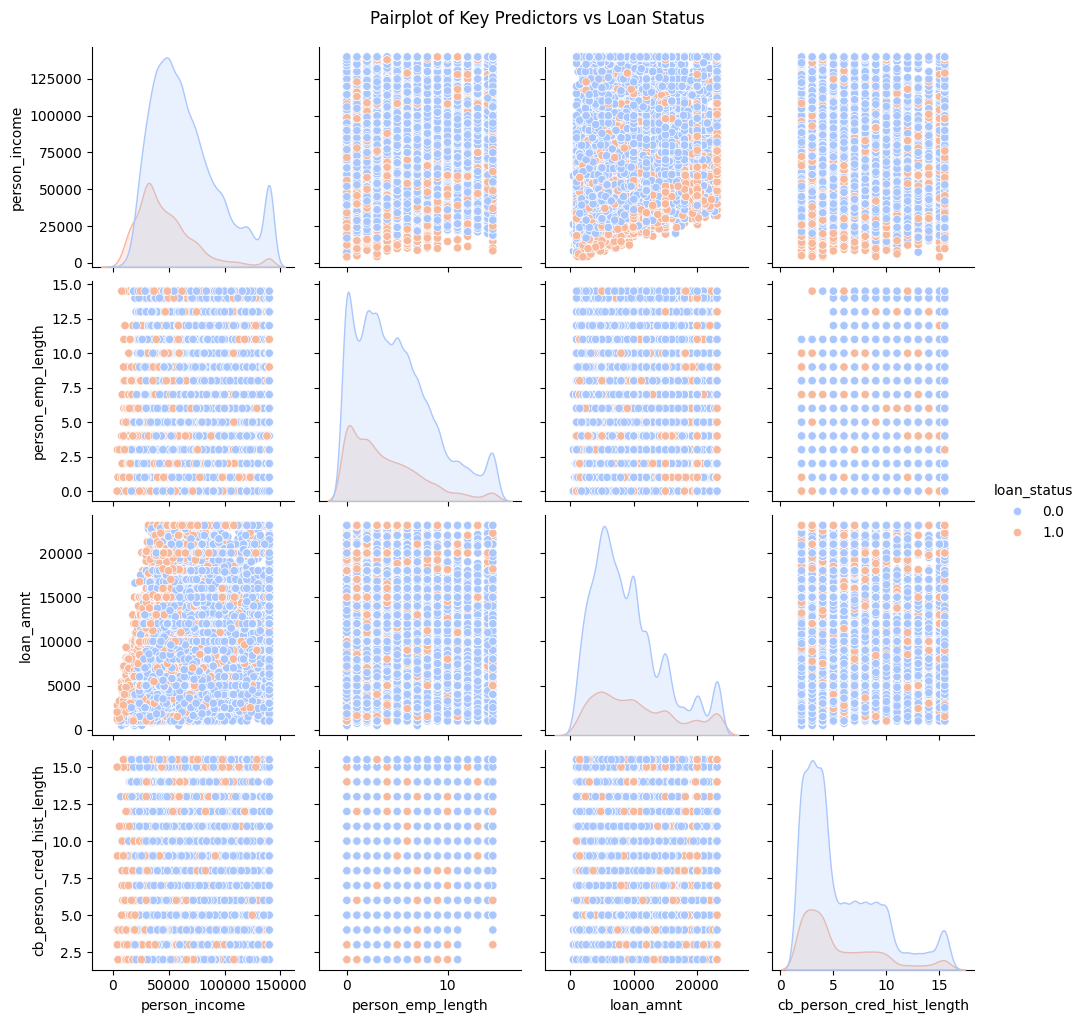

In [192]:
important_features = [
    "person_income",
    "person_emp_length",
    "loan_amnt",
    "cb_person_cred_hist_length",
    "loan_status"
]

sns.pairplot(
    credit_df[important_features],
    hue="loan_status",
    diag_kind="kde",
    palette="coolwarm"
)
plt.suptitle("Pairplot of Key Predictors vs Loan Status", y=1.02)
plt.show()


Observation
- The pairplot shows that loan defaults (orange points) are more common among borrowers who have:
-Low income
- Short employment length (0–2 years)
- Short credit history length


# Correlation Heatmap
- A correlation heatmap is a visualization that shows how strongly numerical features in your dataset are related to each other.

- --> It uses correlation values:
- +1.0 → perfect positive relationship
- 0 → no relationship
- -1.0 → perfect negative relationship

-  --> Heatmap uses colors:
- Dark Red → high positive correlation
- Dark Blue → high negative correlation
- Light Colors → weak or no correlation

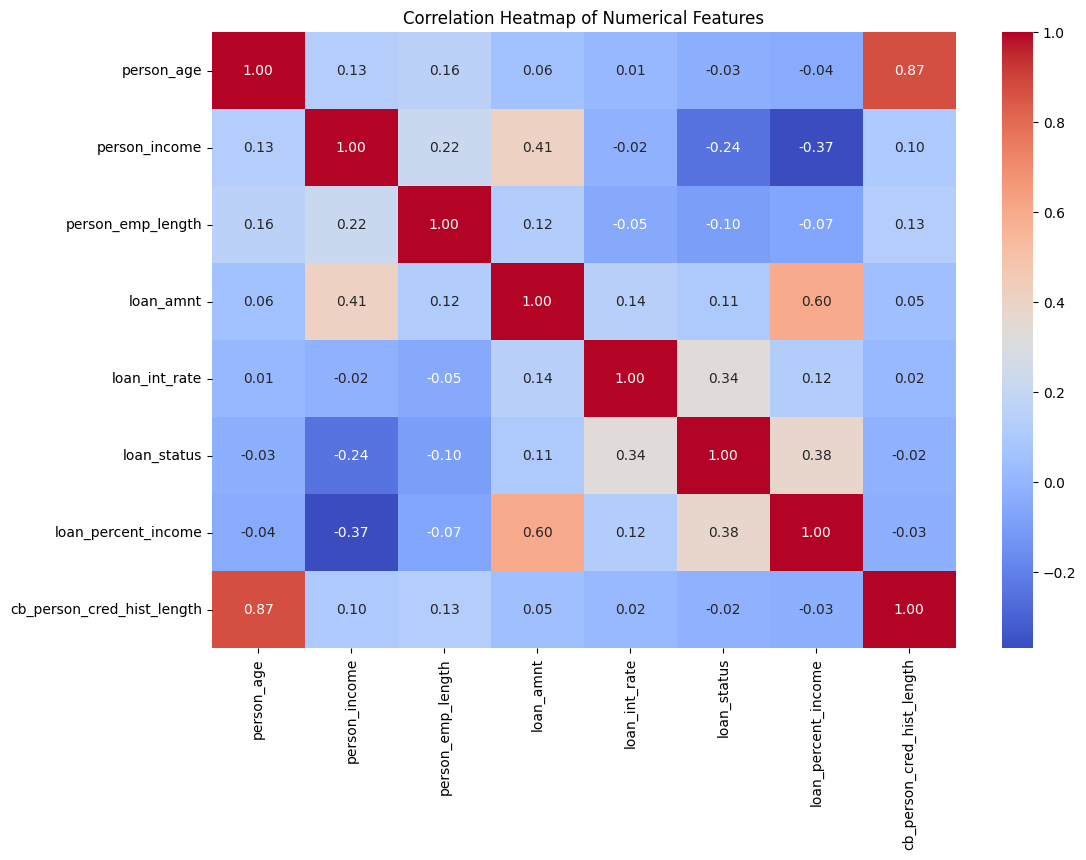

In [187]:
# Select only numeric columns
numeric_df = credit_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



Interpretation:
- 1. Most correlations are weak
- Values like 0.01, -0.03, 0.12 → mean no strong linear relationship.
- So the dataset is not dominated by highly correlated features (good for ML).

- Age and credit history length show a strong logical relationship (0.87).
- Loan amount moderately correlates with income and debt-to-income ratio.
- Loan interest rate is almost independent of other features.
- Default (loan_status) cannot be predicted by a single variable.
-  It is influenced by multiple small factors combined